In [1]:
import sys
from pathlib import Path
from addict import Dict as Adict
import pandas as pd
import seaborn as sns
import mdtraj as md
from natsort import natsorted

sys.path.insert(0, '/home/rzhu/Desktop/projects/kinase_analysis/src/')
from funcs_featurise import *
from funcs_db_assign import *
from funcs_indices import *
from funcs_plotting import *
from funcs_sample import *
from TrajData import TrajData
from MSMStudy import MSMStudy

In [2]:
plt.rcParams['xtick.labelsize'] = 14  # Font size for x-tick labels
plt.rcParams['ytick.labelsize'] = 14  # Font size for y-tick labels
plt.rcParams['legend.fontsize'] = 16  # Font size for legend
plt.rcParams['axes.labelsize'] = 18   # Font size for x-label and y-label
plt.rcParams['axes.titlesize'] = 18   # Font size for title

In [3]:
protein = 'abl'
key = 'abl-pdb-50ps' # Dataset key 
study = 'scan_lags' # where the results are saved
data_path = Path(f'/home/rzhu/Desktop/projects/kinase_analysis/data') # base dir

hps_df = pd.read_csv(data_path/f'{protein}'/'msm'/f'{study}'/'hps.csv')
TD = TrajData(protein = protein)
TD.add_dataset(rtraj_dir = Path(f'/arc/abl_processed/'), 
               ftraj_dir= data_path / f'{protein}'/ f'{key}' / 'ftrajs',
               dt=0.05,
               key=key)
study = MSMStudy(hps_table = hps_df,
                 traj_data = TD,
                 wk_dir = data_path/f'{protein}'/'msm'/f'{study}')
study.observation

Setting dataset <abl-pdb-50ps>. 
Number of raw trajectories: 749



,hp_id,time_consumed,is_sparse,ev_1,ev_2,ev_3,ev_4,ev_5,ev_6,ev_7,...,vamp2_std_2,vamp2_std_3,vamp2_std_4,vamp2_std_5,vamp2_std_6,vamp2_std_7,vamp2_std_8,vamp2_std_9,vamp2_std_10,vamp2_std_11
0,1,1078.257662,False,1.0,0.999902,0.999815,0.999793,0.999609,0.999474,0.998576,...,0.000117,0.000127,0.000220,0.000159,0.000176,0.000176,0.000184,0.000194,0.000201,0.001091
1,2,991.701226,False,1.0,0.999889,0.999799,0.999790,0.999439,0.999376,0.997497,...,0.000107,0.000151,0.000238,0.000191,0.000222,0.000230,0.000248,0.000275,0.000299,0.002165
2,3,1000.619389,False,1.0,0.999890,0.999791,0.999772,0.999432,0.999371,0.997512,...,0.000129,0.000144,0.000160,0.000178,0.000210,0.000220,0.000233,0.000262,0.000268,0.001021
3,4,978.668482,False,1.0,0.999894,0.999777,0.999766,0.999448,0.999399,0.997448,...,0.000150,0.000164,0.000259,0.000199,0.000236,0.000237,0.000262,0.000291,0.000313,0.000323
4,5,984.544526,False,1.0,0.999883,0.999780,0.999753,0.999432,0.999366,0.997466,...,0.000094,0.000147,0.000248,0.000213,0.000204,0.000212,0.000242,0.000261,0.000261,0.002848
5,6,975.597075,False,1.0,0.999885,0.999785,0.999748,0.999425,0.999358,0.997507,...,0.000117,0.000158,0.000293,0.000218,0.000253,0.000267,0.000284,0.000308,0.000309,0.002326
6,7,1073.883161,False,1.0,0.999907,0.999773,0.999755,0.999429,0.999332,0.997496,...,0.000151,0.000182,0.000176,0.000190,0.000241,0.000249,0.000261,0.000291,0.000310,0.002876
7,8,967.878956,False,1.0,0.999883,0.999763,0.999753,0.999415,0.999339,0.997499,...,0.000115,0.000157,0.000239,0.000233,0.000235,0.000246,0.000259,0.000272,0.000285,0.002878
8,9,1051.143753,False,1.0,0.999904,0.999758,0.999734,0.999428,0.999353,0.997497,...,0.000182,0.000174,0.000199,0.000202,0.000214,0.000220,0.000252,0.000278,0.000288,0.003152
9,10,977.966633,False,1.0,0.999880,0.999764,0.999752,0.999428,0.999329,0.997505,...,0.000133,0.000155,0.000189,0.000198,0.000217,0.000217,0.000251,0.000270,0.000284,0.001736


In [4]:
study.hps_table

,hp_id,datasets,features,dt_out,time_cutoff,tica_lag_time,tica_stride,tica_dim,tica_kinetic_map,cluster_n,cluster_stride,cluster_max_iter,seed,markov_lag_time,markov_count_mode,markov_count_prior,msm_mode
0,1,abl-pdb-50ps,dbdist dbdihed achelix aloop,0.05,100,1,1000,20,True,1000,1000,1000,42,1,effective,True,bayesian
1,2,abl-pdb-50ps,dbdist dbdihed achelix aloop,0.05,100,1,1000,20,True,1000,1000,1000,42,11,effective,True,bayesian
2,3,abl-pdb-50ps,dbdist dbdihed achelix aloop,0.05,100,1,1000,20,True,1000,1000,1000,42,21,effective,True,bayesian
3,4,abl-pdb-50ps,dbdist dbdihed achelix aloop,0.05,100,1,1000,20,True,1000,1000,1000,42,31,effective,True,bayesian
4,5,abl-pdb-50ps,dbdist dbdihed achelix aloop,0.05,100,1,1000,20,True,1000,1000,1000,42,41,effective,True,bayesian
5,6,abl-pdb-50ps,dbdist dbdihed achelix aloop,0.05,100,1,1000,20,True,1000,1000,1000,42,51,effective,True,bayesian
6,7,abl-pdb-50ps,dbdist dbdihed achelix aloop,0.05,100,1,1000,20,True,1000,1000,1000,42,61,effective,True,bayesian
7,8,abl-pdb-50ps,dbdist dbdihed achelix aloop,0.05,100,1,1000,20,True,1000,1000,1000,42,71,effective,True,bayesian
8,9,abl-pdb-50ps,dbdist dbdihed achelix aloop,0.05,100,1,1000,20,True,1000,1000,1000,42,81,effective,True,bayesian
9,10,abl-pdb-50ps,dbdist dbdihed achelix aloop,0.05,100,1,1000,20,True,1000,1000,1000,42,91,effective,True,bayesian


In [5]:
study.set_hp_id(11)

Set dataset abl-pdb-50ps stride to 1
Loading MSM model id 11 from /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/scan_lags/11
{'hp_id': 11, 'datasets': 'abl-pdb-50ps', 'features': 'dbdist dbdihed achelix aloop', 'dt_out': 0.05, 'time_cutoff': 100, 'tica_lag_time': 1, 'tica_stride': 1000, 'tica_dim': 20, 'tica_kinetic_map': True, 'cluster_n': 1000, 'cluster_stride': 1000, 'cluster_max_iter': 1000, 'seed': 42, 'markov_lag_time': 101, 'markov_count_mode': 'effective', 'markov_count_prior': True, 'msm_mode': 'bayesian'}
Loading trajectories...
Loading models...
Done


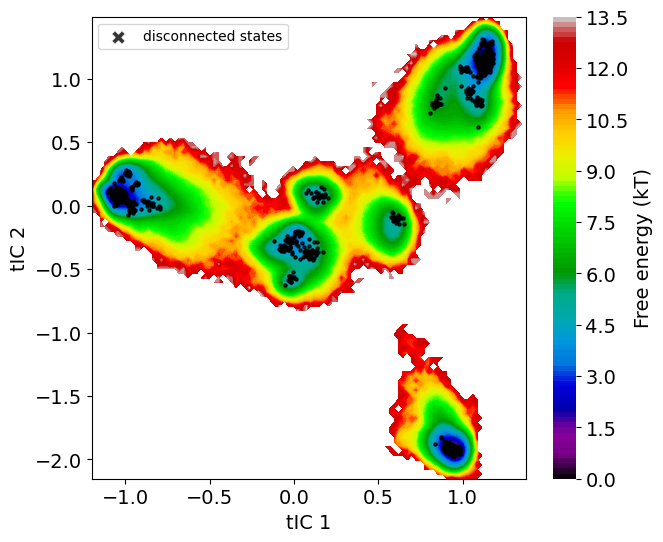

In [6]:
# Free energy surface with microstates 
plot_fe(traj_all=study.ttraj_cat,
        traj_weights = np.concatenate(study.traj_weights, axis=0),
        c_centers=study.kmeans_centers[study.connected_states, :],
        c_centers_s=20,
        d_centers=study.kmeans_centers[study.disconnected_states, :],
        d_centers_s=30,
        savedir=study.fig_dir/'free_energy.pdf'
        )

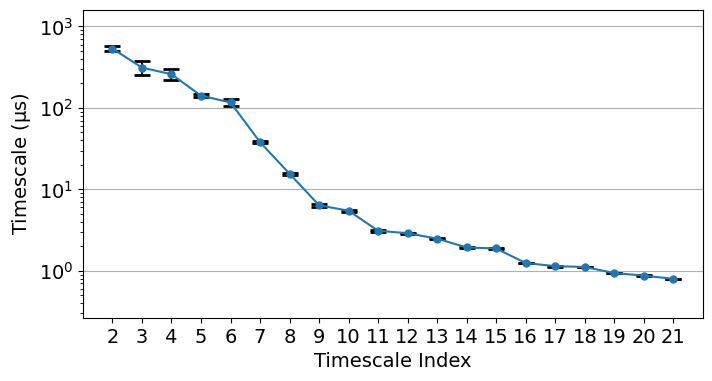

In [7]:
# Timescales 
plot_ts(timescales=study.baymsm_mod.timescales()[1], 
        #timescales=study.msm_mod.timescales(),
        n_ts = 20, 
        dt = study.hp_dict.dt_out, 
        savedir = study.fig_dir/'timescales.pdf')

### Coarse-grain with PCCA

In [6]:
study.run_pcca(6)

/home/rzhu/Desktop/projects/kinase_analysis/src/funcs_plotting.py:103: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(c_centers[state_assignment == i, dim_1], c_centers[state_assignment == i, dim_2],


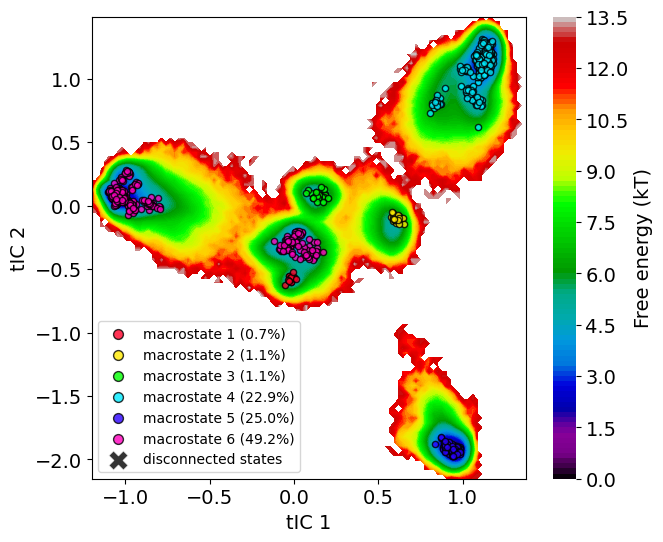

In [9]:
# Free energy surface with microstates colored by PCCA states
plot_fe(traj_all=study.ttraj_cat,
        traj_weights = np.concatenate(study.traj_weights, axis=0),
        c_centers=study.kmeans_centers[study.connected_states, :],
        c_centers_s=80,
        state_assignment=study.pcca_mod.assignments,
        n_states=study.pcca_n,
        state_population=study.pcca_mod.coarse_grained_stationary_probability,
        linewidth=1,
        d_centers=study.kmeans_centers[study.disconnected_states, :],
        d_centers_s=30,
        d_centers_marker='X',
        legend_marker_sizes=[200, 200, 200, 200, 200, 200, 200],
        savedir = study.fig_dir/'pcca.pdf')

In [ ]:
# I may want to show the crystal structures in the free energy surface
# I load the crystals and featurise them here

crystal_files = natsorted([str(f) for f in Path(f"/arc/human_{protein}/").glob("kinoml*.pdb")])
print('Number of crystal structures:', len(crystal_files))

frames = [] 
for crystal in crystal_files:
    sample_frame = md.load(crystal)
    sample_frame = sample_frame.atom_slice(sample_frame.top.select('mass>1.1'))
    frames.append(sample_frame)
crystals = md.join(frames)
crystals = crystals.superpose(crystals, 0)

featurisers = [dbdist_featuriser, dbdihed_featuriser, aloop_featuriser, achelix_featuriser]
c_ftrajs_dict = {f.__name__.split('_')[0]:[f(traj=crystals, protein=protein)] for f in featurisers}
c_ftrajs, _ = TD.prepare_ftrajs(c_ftrajs_dict, stride=1, frame_no_cutoff=0, convert_dihed_ids=[1])
c_ttraj, dtraj, connected_d, c_disconnected_d, c_pcca_assignment = study.transform(c_ftrajs)

In [32]:
# Load the precomputed Dunbrack states assignment 
# hdbscan_dist_group / hdbscan_dihed_group -- used hdbscan
# distgroup / dihedgroup -- used average-linkage hierachical clustering 

TD.load_ftrajs(key=key,
               feature_names=['hdbscan_dist_group', 'hdbscan_dihed_group'],)
distgroup, _ = TD.get_ftrajs(keys=key, 
                             dt_out=0.05, 
                             internal_names=['hdbscan_dist_group'], 
                             time_cutoff=100,
                             convert_dihed_ids=None)
dihedgroup, _ = TD.get_ftrajs(keys=key, 
                              dt_out=0.05, 
                              internal_names=['hdbscan_dihed_group'], 
                              time_cutoff=100,
                              convert_dihed_ids=None)
distgroup_cat = np.concatenate(distgroup).flatten()
dihedgroup_cat = np.concatenate(dihedgroup).flatten()

abl-pdb-50ps
Loading feature:  hdbscan_dist_group


100%|██████████| 749/749 [00:02<00:00, 343.60it/s]


Loading feature:  hdbscan_dihed_group


100%|██████████| 749/749 [00:00<00:00, 867.60it/s] 


Stride for dataset abl-pdb-50ps with timestep 0.05 ns: 1
Preparing feature trajectories...


100%|██████████| 749/749 [00:00<00:00, 49762.14it/s]


Stride for dataset abl-pdb-50ps with timestep 0.05 ns: 1
Preparing feature trajectories...


100%|██████████| 749/749 [00:00<00:00, 42282.88it/s]


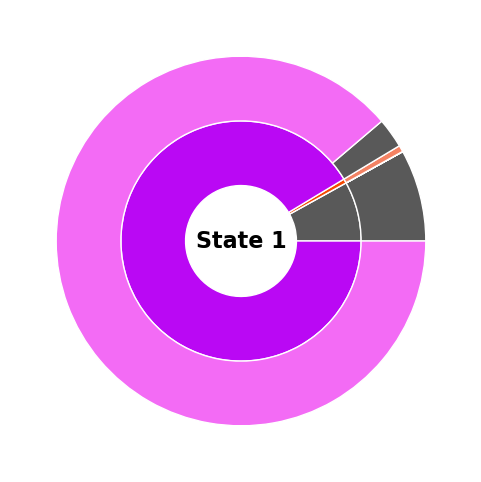

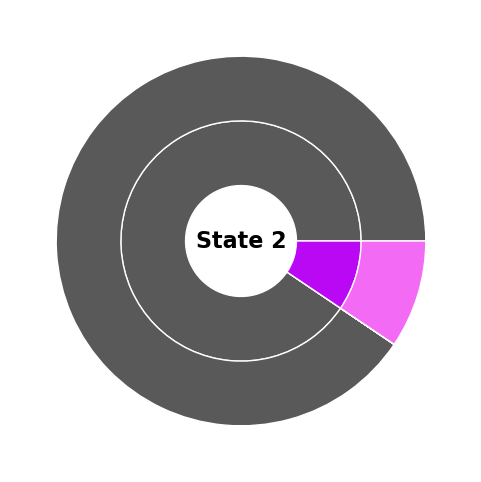

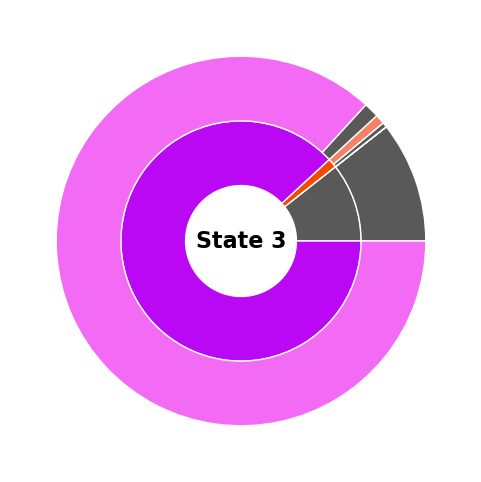

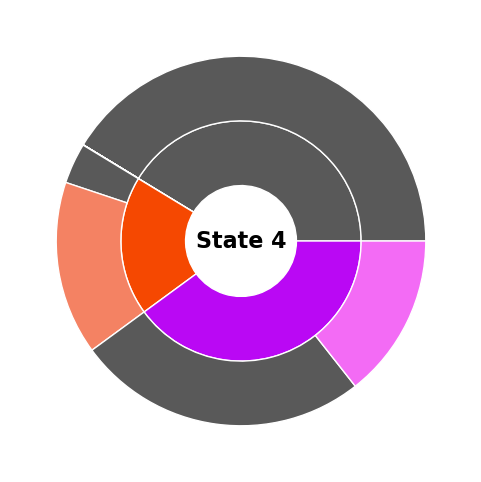

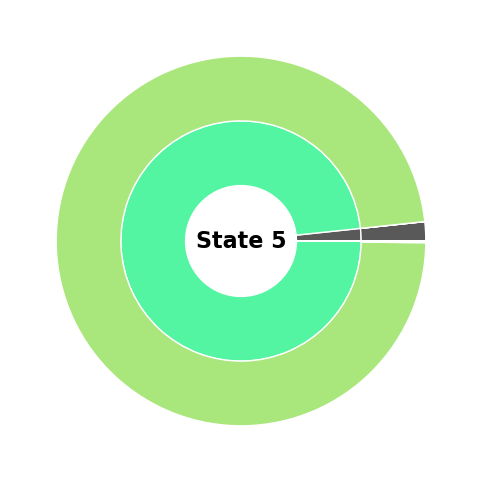

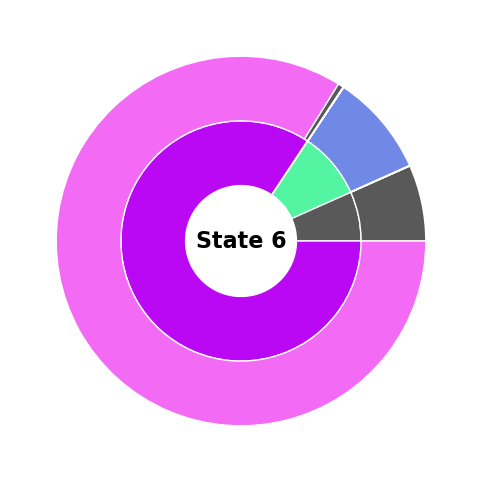

In [38]:
# Plot the Dunbrack state compostition for each macrostate
# Note - the color scheme haven't been changed yet
# They should match the palette used in VMD
# I also need to come up with a palette for Dunbrack states 

dfg_spatial_colors = np.array(['#595959',       # Grey noise
                               '#53F4A2',       # Green DFG-in
                               '#F54801',       # Red DFG-inter
                               '#BA08F4'])      # Purple DFG-out

sim_ptraj_cat = np.array([study.micro_to_macro[d] if d in study.connected_states else -1 for d in study.dtraj_cat])

for state_i in range(study.pcca_n):
    frame_indices = np.where(sim_ptraj_cat == state_i)[0]
    spatial_assignments, dihed_assignments = distgroup_cat[frame_indices], dihedgroup_cat[frame_indices]
    
    spatial_counts, dihed_counts = dunbrack_count(spatial_assignments, dihed_assignments)
    plot_dihed_pie(spatial_counts, dihed_counts, 
                   show_legend=False, show_dihed='no_labels', radius_size=0.35, 
                   dfg_spatial_colors=dfg_spatial_colors,
                   title=f'State {state_i+1}', 
                   savedir=study.fig_dir/f'state_{state_i+1}_dihed.pdf')

### Coarse-grained transition matrix and MFPT

In [12]:
# Compute MFPT matrix

mfpt = np.zeros([study.pcca_n, study.pcca_n])
mfpt_std = np.zeros([study.pcca_n, study.pcca_n])

for i in range(study.pcca_n):
    for j in range(study.pcca_n):
        mfpt[i,j] = study.baymsm_mod.gather_stats('mfpt', A=study.pcca_mod.sets[i], B=study.pcca_mod.sets[j]).mean
        mfpt_std[i,j] = study.baymsm_mod.gather_stats('mfpt', A=study.pcca_mod.sets[i], B=study.pcca_mod.sets[j]).std

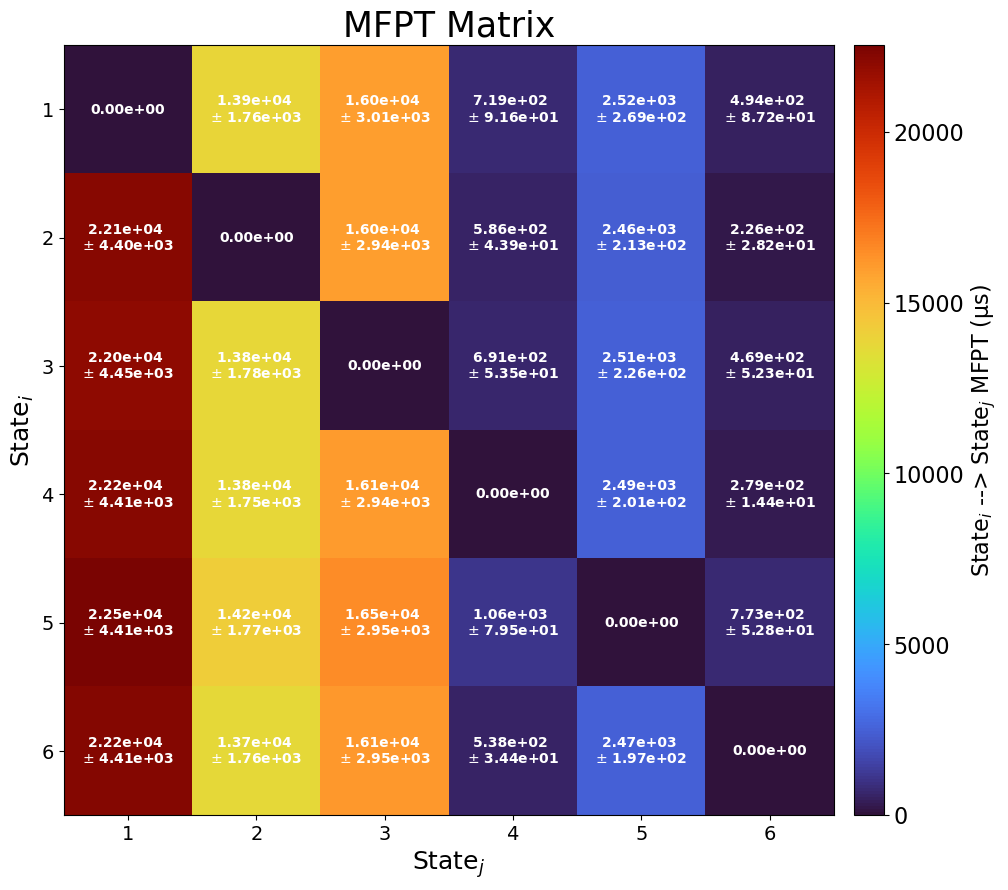

In [13]:
# MFPT matrix
plot_mfpt_matrix(mfpt = mfpt,
                 mfpt_err = mfpt_std, 
                 dt = study.hp_dict.dt_out,
                 text_f =".2e",
                 savedir = study.fig_dir/'mfpt_matrix.pdf')

/home/rzhu/Desktop/projects/kinase_analysis/src/funcs_plotting.py:175: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(c_centers[pcca_assignment == i, dim_1], c_centers[pcca_assignment == i, dim_2],


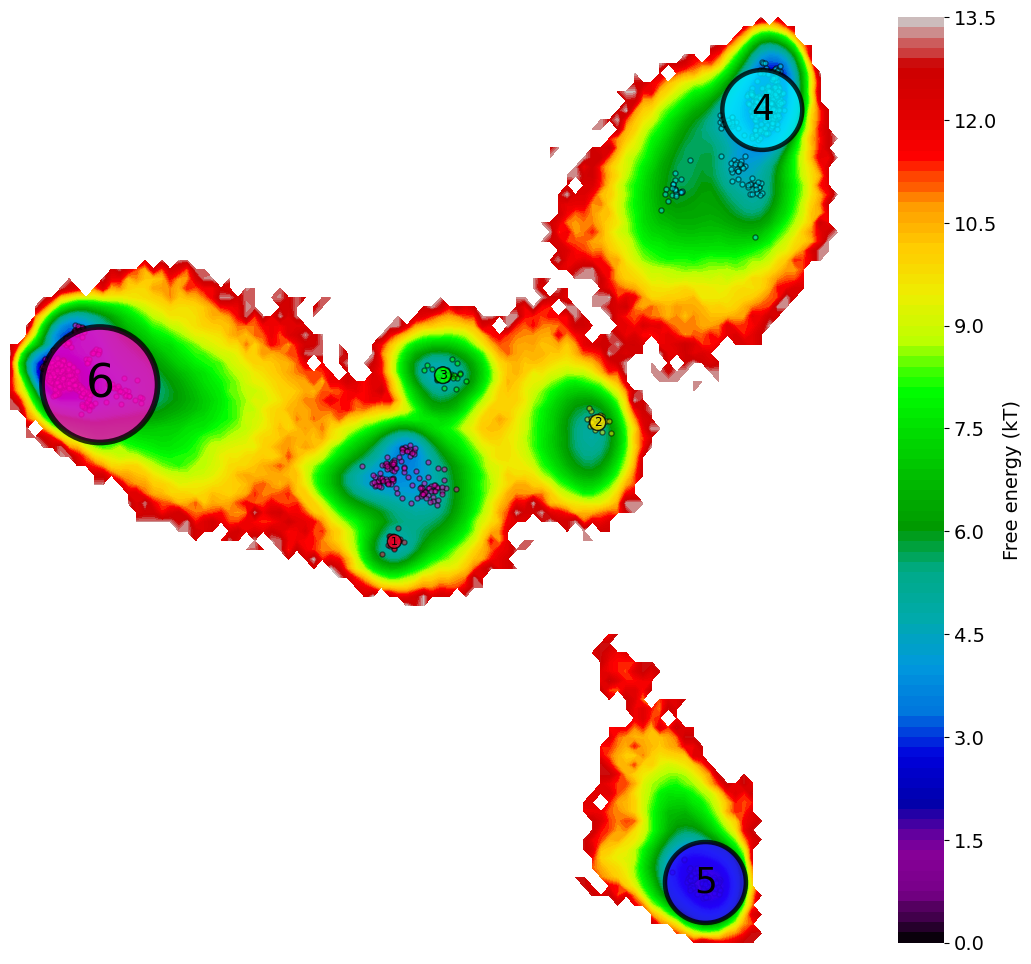

In [14]:
# MFPT graph 
plot_pcca_graph(traj_all = study.ttraj_cat,
                traj_weights = np.concatenate(study.traj_weights, axis=0),
                c_centers = study.kmeans_centers[study.connected_states, :],
                c_centers_a = 0.5,
                c_centers_s = 50,
                matrix = mfpt,
                pcca_assignment = study.pcca_mod.assignments,
                stat_dist = study.msm_mod.stationary_distribution,
                savedir = study.fig_dir/'mfpt_graph.pdf')

### Eigenvectors

In [ ]:
# Plot the top 10 eigenvectors 
# The max and min are shown in red and blue respectively
for ev_id in range(10):
    plot_ev(ev = study.msm_mod.eigenvectors_right()[:,ev_id+1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                ],
            c_centers = study.kmeans_centers[study.connected_states,:],
            traj_all = study.ttraj_cat,
            traj_weights = np.concatenate(study.traj_weights,axis=0),
            title = f'eigenvector_{ev_id+2}',
            savedir = study.fig_dir/f'eigenvector_{ev_id+2}.svg')

### Sample from each macrostate

In [ ]:
# Sample from each macrostate 
n_sample = 100
for pcca_state in range(study.pcca_n):
    samples = study.sample_from_macrostate(n_sample = n_sample,
                                           macrostate_id = pcca_state,
                                           ci_cutoff = 0.8,
                                           weights ='equilibrium')  # weights based on stationary distribution
    study.save_samples(samples, 
                       fname = study.sample_dir/f'macrostate_{pcca_state}_{n_sample}_samples.pdb',
                       save_ids=True)

In [ ]:
# For Josh's writhe analysis
# I retrieve the transition matrix and the sub-matrix for the samples 
# This cell is irrelevant for the analysis

import json

np.save(study.sample_dir/'tmax.npy', study.msm_mod.transition_matrix)

dtrajs = []
for s_files in list(study.sample_dir.rglob('macrostate_*_samples.json')):
    samples = json.load(open(s_files, 'r'))
    for ftraj_id, frame_ids in samples.items():
        for frame_id in frame_ids:
            dtrajs.append(study.dtrajs[int(ftraj_id)][int(frame_id)])

sub_transition_matrix = study.msm_mod.transition_matrix[np.ix_(dtrajs, dtrajs)]
np.save(study.sample_dir/'sample_tmax.npy', sub_transition_matrix)

### Sample core microstates for PCCA+ macrostates

In [ ]:
# For each macrostate, I sample n_sample=100 structures from the microstates 
# that have the top k=3 membership probabilities

n_sample = 100
k=3

for pcca_state in range(study.pcca_n):
    microstate_indices = np.argsort(study.pcca_mod.memberships[:,pcca_state])[-k:]
    distrib = np.zeros(len(study.connected_states))
    distrib[microstate_indices] = 1/k

    samples = study.sample_from_distrib(n_sample, distrib)
    study.save_samples(samples, 
                       fname = study.sample_dir/f'macrostate_{pcca_state}_core_{n_sample}_samples.pdb',
                       save_ids=True)

Saved samples to /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/scan_lags/11/samples/macrostate_0_core_100_samples.pdb
Saved samples to /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/scan_lags/11/samples/macrostate_1_core_100_samples.pdb
Saved samples to /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/scan_lags/11/samples/macrostate_2_core_100_samples.pdb
Saved samples to /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/scan_lags/11/samples/macrostate_3_core_100_samples.pdb
Saved samples to /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/scan_lags/11/samples/macrostate_4_core_100_samples.pdb
Saved samples to /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/scan_lags/11/samples/macrostate_5_core_100_samples.pdb


### Sample core microstates for slow processes

In [18]:
# For the slowest n=2 processes (eigenvectors), I sample n_sample=100 structures from
# the microstates whose eigenvector components 
# lie at the highest-k-positive and highest-k-negative extremes of each process

n=2
n_sample=100
k=2

for ev_id in range(2):
    ev = study.msm_mod.eigenvectors_right()[:,ev_id+1]
    ev_pos_indices = np.argsort(ev)[-k:]
    ev_neg_indices = np.argsort(ev)[:k]

    distrib = np.zeros(len(study.connected_states))
    distrib[ev_pos_indices] = 1/k
    samples = study.sample_from_distrib(n_sample, distrib)
    study.save_samples(samples, 
                       fname = study.sample_dir/f'process_{ev_id+1}_core_positive_{n_sample}_samples.pdb',
                       save_ids=True)
    
    distrib = np.zeros(len(study.connected_states))
    distrib[ev_neg_indices] = 1/k
    samples = study.sample_from_distrib(n_sample, distrib)
    study.save_samples(samples, 
                       fname = study.sample_dir/f'process_{ev_id+1}_core_negative_{n_sample}_samples.pdb',
                       save_ids=True)

/home/rzhu/Loc/miniconda3/envs/msm/lib/python3.10/site-packages/mdtraj/core/trajectory.py:441: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")


Saved samples to /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/scan_lags/11/samples/process_1_core_positive_100_samples.pdb
Saved samples to /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/scan_lags/11/samples/process_1_core_negative_100_samples.pdb
Saved samples to /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/scan_lags/11/samples/process_2_core_positive_100_samples.pdb
Saved samples to /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/scan_lags/11/samples/process_2_core_negative_100_samples.pdb


### The highest flux pathways and the bottleneck states

In [19]:
# I find the macrostates that are most likely to be the active and inactive states
# according to the FES and Dunbrack state decomposition
# I use a confidence of 0.95 to filter out the some microstates. The value can be adjusted

inactive_ms_id = 5
active_ms_id = 4

start_state_ids = np.where(study.pcca_mod.memberships[:,inactive_ms_id] > 0.95)[0]
end_state_ids = np.where(study.pcca_mod.memberships[:,active_ms_id] > 0.95)[0]
print(start_state_ids, end_state_ids)

[  0  10  11  13  15  16  18  25  26  27  29  31  34  40  41  42  44  46
  47  49  52  54  55  56  58  60  62  63  69  70  79  80  84  85  87  90
  92  93  94  96  98 100 102 108 110 111 112 113 117 120 122 125 128 131
 132 133 135 136 137 138 144 148 150 151 154 155 156 158 162 164 166 169
 170 175 176 177 180 182 184 189 191 193 195 196 197 202 204 205 206 209
 211 215 217 218 221 222 224 229 234 236 238 246 251 252 254 255 256 258
 259 260 261 262 264 269 271 274 279 280 282 285 289 298 303 304 305 310
 311 312 313 314 317 318 322 325 328 330 333 335 337 338 339 344 345 346
 347 351 355 356 359 362 363 365 367 368 369 373 379 386 387 388 389 391
 393 394 396 398 399 401 404 406 408 412 413 417 419 423 425 426 429 430
 431 435 441 443 445 449 454 457 460 461 463 464 467 468 474 476 477 478
 479 480 486 487 493 494 495 497 500 501 502 506 508 513 518 520 522 524
 525 526 527 528 533 535 540 541 544 545 550 553 554 555 559 560 564 565
 570 575 576 577 578 580 581 582 583 590 593 596 60

In [20]:
# Compute the tpt pathways 
tpt_activation = study.msm_mod.reactive_flux(start_state_ids, end_state_ids)
paths, pathfluxes = tpt_activation.pathways(fraction=1.0)

/home/rzhu/Loc/miniconda3/envs/msm/lib/python3.10/site-packages/deeptime/markov/tools/flux/pathways.py:294: RuntimeWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", RuntimeWarning)


Identify the pathway with the highest flux

In [22]:
max_flux_index = np.argmax(pathfluxes)
highest_flux_pathway = paths[max_flux_index]
highest_flux_value = pathfluxes[max_flux_index]
print('States in the highest flux pathway:', highest_flux_pathway)

States in the highest flux pathway: [791 714 515]


Identify the minimum flux transition (the bottleneck states)

In [23]:
path_fluxes = [tpt_activation.net_flux[highest_flux_pathway[i], highest_flux_pathway[i+1]]
               for i in range(len(highest_flux_pathway) - 1)]
bottleneck_index = np.argmin(path_fluxes)
bottleneck_state = highest_flux_pathway[bottleneck_index]
bottleneck_flux_value = path_fluxes[bottleneck_index]
print('Index of the bottleneck state:', bottleneck_index)

Index of the bottleneck state: 0


Generate samples from the highest flux trajectory.

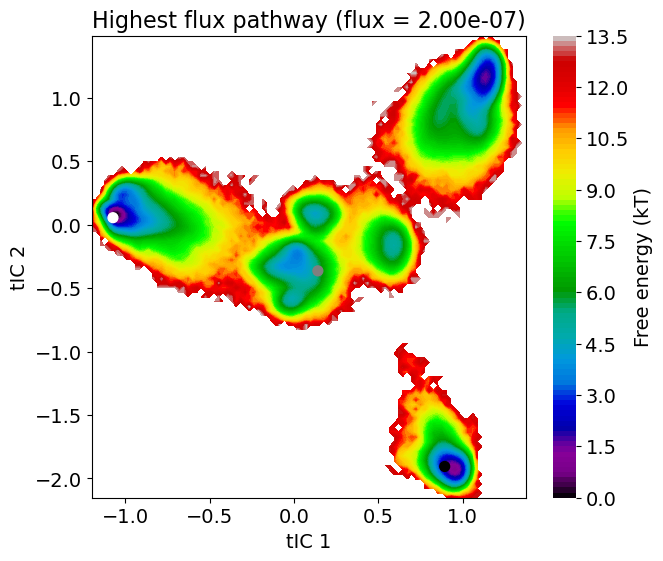

In [24]:
cmap = plt.get_cmap('binary')
colors = cmap(np.linspace(0, 1, len(highest_flux_pathway)))

plot_fe(traj_all = study.ttraj_cat,
        traj_weights = np.concatenate(study.traj_weights, axis=0),
        c_centers = study.kmeans_centers[highest_flux_pathway, :],
        c_centers_c = colors,
        c_centers_marker = 'o',
        c_centers_a = 1,
        c_centers_s = 50,
        linewidth = 1,
        title = f'Highest flux pathway (flux = {highest_flux_value:.2e})',
        savedir= study.fig_dir/'highest_flux_path.pdf')

Sample the microstates before and after the bottleneck

In [25]:
n_sample = 10
state_before_bottleneck = highest_flux_pathway[bottleneck_index]
state_after_bottleneck = highest_flux_pathway[bottleneck_index + 1]

samples = study.sample_from_microstate(n_sample=n_sample, microstate_id=state_before_bottleneck)
study.save_samples(samples, 
                   fname = study.sample_dir/f'bottleneck_state_{n_sample}_samples.pdb',
                   save_ids=True)

samples = study.sample_from_microstate(n_sample=n_sample, microstate_id=state_after_bottleneck)
study.save_samples(samples, 
                   fname = study.sample_dir/f'post_bottleneck_state_{n_sample}_samples.pdb',
                   save_ids=True)

/home/rzhu/Loc/miniconda3/envs/msm/lib/python3.10/site-packages/mdtraj/core/trajectory.py:441: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")


Saved samples to /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/scan_lags/11/samples/bottleneck_state_10_samples.pdb
Saved samples to /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/scan_lags/11/samples/post_bottleneck_state_10_samples.pdb


Plot the Dunbrack state decomposition for states along the highest flux pathway

In [34]:
index_states = compute_index_states(study.dtrajs)
snapshot_ids = [index_states[state] for state in highest_flux_pathway]
state_dihedgroup_counts = []
for i in range(len(highest_flux_pathway)):
    assignment = np.concatenate([dihedgroup[id[0]][id[1]] for id in snapshot_ids[i]])
    counts = [np.count_nonzero([assignment == i]) for i in range(-1, 8)]
    state_dihedgroup_counts.append(counts)
dihedgroup_state_counts = np.array(state_dihedgroup_counts).T

14081.0


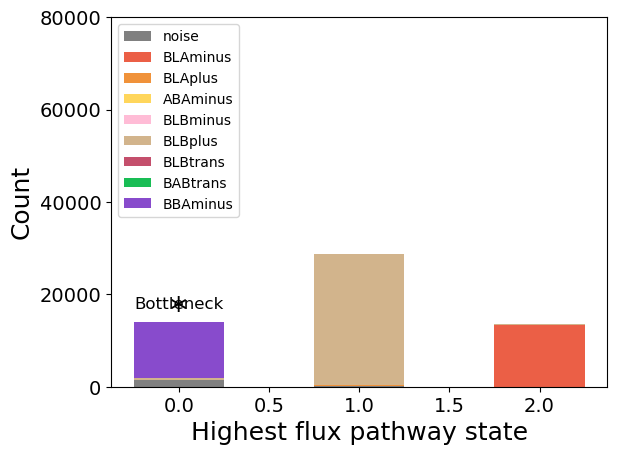

In [35]:
# Again I will need to update the color scheme 

x = list(range(len(highest_flux_pathway)))
dihed_colors = np.array([
                    (128/255, 128/255, 128/255),   # Gray
                    (235/255, 95/255, 70/255),     # Light Red
                    (240/255, 146/255, 58/255),    # Flamebright
                    (255/255, 214/255, 92/255),    # Light yellow
                    (255/255, 188/255, 214/255),   # Light pink
                    (210/255, 180/255, 140/255),   # Tan
                    (196/255, 79/255, 108/255),    # Strawberry
                    (25/255, 189/255, 85/255),     # Light Green
                    (136/255, 75/255, 204/255)])   # Light Purple
labels = ['noise', 'BLAminus', 'BLAplus', 'ABAminus', 'BLBminus', 'BLBplus', 'BLBtrans', 'BABtrans', 'BBAminus']

width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(len(highest_flux_pathway))
y = 0

for group_name, group_count, color in zip(labels, dihedgroup_state_counts, dihed_colors):
    p = ax.bar(x, group_count, width, label=group_name, bottom=bottom, color=color)
    y += p[bottleneck_index].get_height()
    bottom += group_count
print(y)
x = p[bottleneck_index].get_x() + p[bottleneck_index].get_width() / 2
ax.text(x, y*0.9, '*', ha='center', va='bottom', fontsize=25, color='k')
ax.annotate("Bottleneck", (x, y), xytext=(x, y*1.2),
            ha='center', color='k', fontsize=12)

ax.set_yticks([0, 20000, 40000, 60000, 80000])
ax.set_ylabel('Count')
ax.set_xlabel('Highest flux pathway state')
ax.legend(loc="upper left", fontsize=10)

plt.savefig(study.fig_dir/'highest_flux_pathway_bottleneck_state.pdf', bbox_inches='tight', dpi=300)
plt.show()

Sample structures from the states before and after the bottleneck

In [ ]:
n_sample = 10
for i, state_id in enumerate(highest_flux_pathway):
    samples = study.sample_from_microstate(n_sample=n_sample, microstate_id=state_id)
    print(samples)
    if i == bottleneck_index:
        study.save_samples(samples, 
                           fname = study.sample_dir/f'bottleneck_{n_sample}_samples.pdb',
                           save_ids=True)
    elif i == bottleneck_index + 1:
        study.save_samples(samples, 
                           fname = study.sample_dir/f'post_bottleneck_{n_sample}_samples.pdb',
                           save_ids=True)
    else:
        study.save_samples(samples, 
                           fname = study.sample_dir/f'pathway_state_index_{i}.pdb',
                           save_ids=True)

[[  236  1656]
 [  237 26257]
 [  237  1578]
 [  234  4550]
 [  238 17426]
 [  236 10431]
 [   68  4736]
 [  234  6055]
 [  237  9259]
 [  238 12455]]


/home/rzhu/Loc/miniconda3/envs/msm/lib/python3.10/site-packages/mdtraj/core/trajectory.py:441: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")


Saved samples to /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/scan_lags/11/samples/pathway_id0_bottleneck.pdb
[[   65  9374]
 [  283 25978]
 [  280 11391]
 [   69 17591]
 [  281 16131]
 [  282 15545]
 [   69   798]
 [   68  1993]
 [  282 14730]
 [  344 22776]]
Saved samples to /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/scan_lags/11/samples/pathway_id1.pdb
[[  260 24544]
 [  263  1222]
 [  262 23881]
 [  261  1944]
 [  263 14256]
 [  220 15081]
 [  262  6026]
 [  263  4537]
 [  208 14153]
 [  262 32562]]
Saved samples to /home/rzhu/Desktop/projects/kinase_analysis/data/abl/msm/scan_lags/11/samples/pathway_id2.pdb


Plot DFG dihedrals along pathway

In [37]:
TD.load_ftrajs(key=key,
               feature_names=['dbdist', 'dbdihed'],)
dbdist, _ = TD.get_ftrajs(keys=key, 
                          dt_out=0.05, 
                          internal_names=['dbdist'], 
                          time_cutoff=100,
                          convert_dihed_ids=None)
dbdihed, _ = TD.get_ftrajs(keys=key, 
                           dt_out=0.05, 
                           internal_names=['dbdihed'], 
                           time_cutoff=100,
                           convert_dihed_ids=None)

abl-pdb-50ps
Loading feature:  dbdist


  0%|          | 0/749 [00:00<?, ?it/s]

100%|██████████| 749/749 [00:04<00:00, 159.86it/s]


Loading feature:  dbdihed


100%|██████████| 749/749 [00:05<00:00, 128.60it/s]


Stride for dataset abl-pdb-50ps with timestep 0.05 ns: 1
Preparing feature trajectories...


100%|██████████| 749/749 [00:00<00:00, 56122.87it/s]


Stride for dataset abl-pdb-50ps with timestep 0.05 ns: 1
Preparing feature trajectories...


100%|██████████| 749/749 [00:00<00:00, 17325.91it/s]


In [38]:
# Load the dihedral cluster centroids for reference
# I will need to use the hdbscan centroids instead 

dihed_centroids_f = data_path / f'{protein}' / 'clustering' / 'dfg_dihed_centroids.npy'
dihed_centroids = np.load(dihed_centroids_f, allow_pickle=True).item()
dihed_centroids = np.concatenate([dihed_centroids['dfg-in'], dihed_centroids['dfg-inter'], dihed_centroids['dfg-out']])

In [39]:
# Load the spatial cluster centroids for reference
# Again use hdbscan 

spatial_centroids_f = data_path / f'{protein}' / 'clustering' / 'dfg_spatial_centroids.npy'
spatial_centroids = np.load(spatial_centroids_f, allow_pickle=True)

spatial_colors = np.array([
(173/255, 35/255, 10/255),   # Red
(28/225, 128/255, 65/255),   # Green
(80/255, 29/255, 138/255)])  # Purple

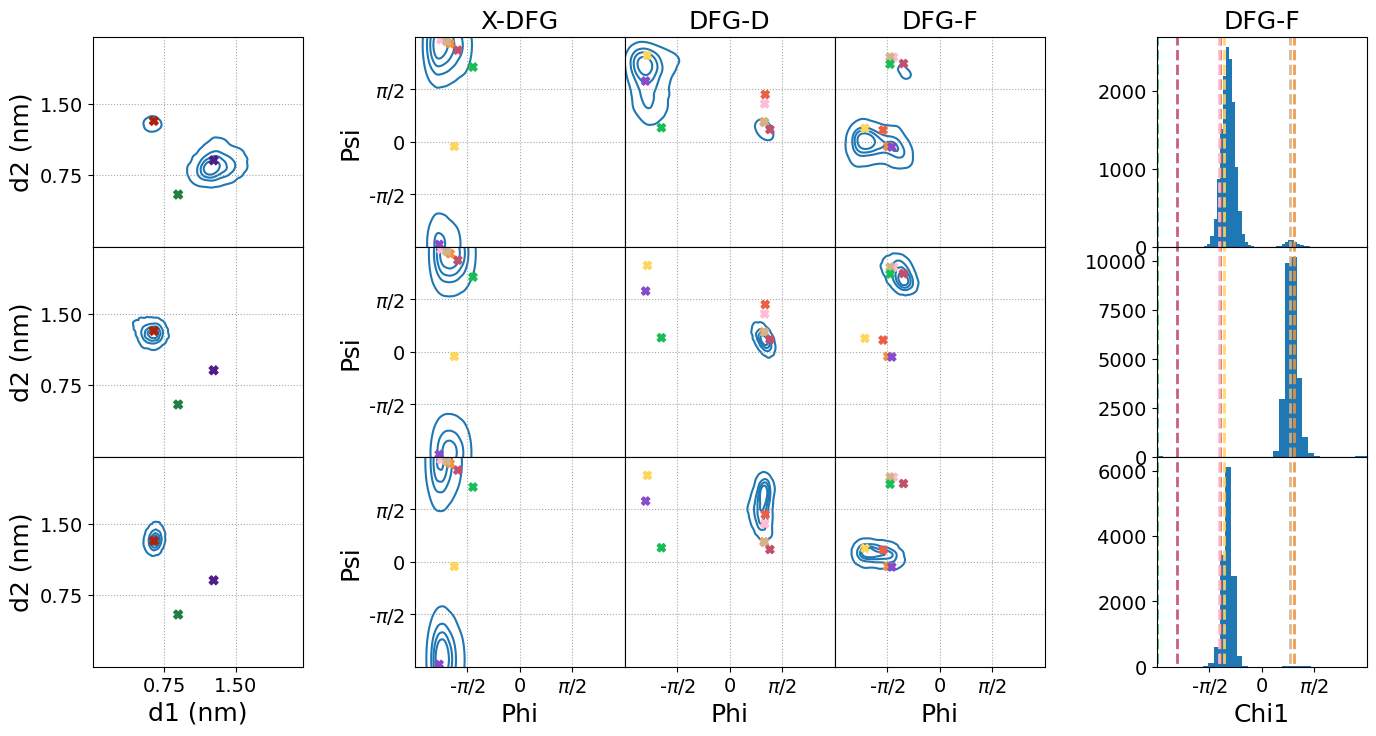

In [40]:
index_states = compute_index_states(study.dtrajs)

nrows = len(highest_flux_pathway)
ncols = 5
ax_size = 0.15

fig = plt.figure(figsize=(14, 14))
axes = []

# Create axes and set ticks and ticklabels 
for i in range(nrows):
    new_row_axes = []
    new_row_axes.append(fig.add_axes([0.10,           1-(i+1)*ax_size, ax_size, ax_size]))
    new_row_axes.append(fig.add_axes([0.18+ax_size,   1-(i+1)*ax_size, ax_size, ax_size]))
    new_row_axes.append(fig.add_axes([0.18+2*ax_size, 1-(i+1)*ax_size, ax_size, ax_size]))
    new_row_axes.append(fig.add_axes([0.18+3*ax_size, 1-(i+1)*ax_size, ax_size, ax_size]))
    new_row_axes.append(fig.add_axes([0.26+4*ax_size, 1-(i+1)*ax_size, ax_size, ax_size]))
    
    for ax in new_row_axes:
        ax.tick_params(left=False, bottom=False, labelbottom=False, labelleft=False)
    new_row_axes[0].tick_params(left=True, bottom=False, labelbottom=False, labelleft=True)
    new_row_axes[1].tick_params(left=True, bottom=False, labelbottom=False, labelleft=True)
    new_row_axes[-1].tick_params(left=True, bottom=False, labelbottom=False, labelleft=True)

    axes.append(new_row_axes)

axes[-1][0].tick_params(left=True,  bottom=True, labelbottom=True, labelleft=True)
axes[-1][1].tick_params(left=True,  bottom=True, labelbottom=True, labelleft=True)
axes[-1][2].tick_params(left=False, bottom=True, labelbottom=True, labelleft=False)
axes[-1][3].tick_params(left=False, bottom=True, labelbottom=True, labelleft=False)
axes[-1][4].tick_params(left=True,  bottom=True, labelbottom=True, labelleft=True)

# Plot data by row 
for i in range(nrows):
    snapshot_ids = index_states[highest_flux_pathway[i]]
    distances = np.array([dbdist[id[0]][id[1]] for id in snapshot_ids])
    # axes[i][0].scatter(distances[:,0], distances[:,1], s=1)
    sns.kdeplot(x=distances[:,0], y=distances[:,1], ax=axes[i][0], levels=5, zorder=1)
    axes[i][0].scatter(spatial_centroids[:,0], spatial_centroids[:,1], color=spatial_colors, marker='X', s=40, zorder=2)
    axes[i][0].set_xlim([0.0, 2.2])
    axes[i][0].set_ylim([0.0, 2.2])
    axes[i][0].set_ylabel('d2 (nm)')
    axes[i][0].set_yticks([0.75, 1.5])
    axes[i][0].set_xticks([0.75, 1.5])
    if i == nrows-1: axes[i][0].set_xlabel('d1 (nm)')
    axes[i][0].grid(color='gray', linestyle=':', alpha=0.7)

    dihedrals = np.array([dbdihed[id[0]][id[1]] for id in snapshot_ids])
    # axes[i][1].scatter(dihedrals[:,0], dihedrals[:,1], s=1)
    # axes[i][2].scatter(dihedrals[:,2], dihedrals[:,3], s=1)
    # axes[i][3].scatter(dihedrals[:,4], dihedrals[:,5], s=1)
    sns.kdeplot(x=dihedrals[:,0], y=dihedrals[:,1], ax=axes[i][1], levels=5, zorder=1)
    sns.kdeplot(x=dihedrals[:,2], y=dihedrals[:,3], ax=axes[i][2], levels=5, zorder=1)
    sns.kdeplot(x=dihedrals[:,4], y=dihedrals[:,5], ax=axes[i][3], levels=5, zorder=1)
    axes[i][1].scatter(dihed_centroids[:,0], dihed_centroids[:,1], color=dihed_colors[1:], marker='X', s=35, zorder=2)
    axes[i][2].scatter(dihed_centroids[:,2], dihed_centroids[:,3], color=dihed_colors[1:], marker='X', s=35, zorder=2)
    axes[i][3].scatter(dihed_centroids[:,4], dihed_centroids[:,5], color=dihed_colors[1:], marker='X', s=35, zorder=2)

    for ax in axes[i][1:4]:
        ax.set_xlim([-np.pi, np.pi])
        ax.set_ylim([-np.pi, np.pi])
        ax.set_xticks([-np.pi/2, 0, np.pi/2])
        ax.set_yticks([-np.pi/2, 0, np.pi/2])
        ax.set_xticklabels([r'-$\pi$/2', '0', r'$\pi$/2'])
        ax.set_yticklabels([r'-$\pi$/2', '0', r'$\pi$/2'])
        if i==nrows-1: 
            ax.set_xlabel('Phi')
        ax.grid(color='gray', linestyle=':', alpha=0.7)

    axes[i][1].set_ylabel('Psi')
    if i == 0: 
        axes[i][1].set_title('X-DFG')
        axes[i][2].set_title('DFG-D')
        axes[i][3].set_title('DFG-F')

    axes[i][4].hist(dihedrals[:,8], bins=36)
    for j in range(dihed_centroids.shape[1]):
        axes[i][4].axvline(x=dihed_centroids[j,6], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], 
                           color=dihed_colors[1:][j], alpha=0.9, linestyle='--', linewidth=2, zorder=2)
    axes[i][4].set_xlim([-np.pi, np.pi])
    if i == nrows-1: 
        axes[i][4].set_xlabel('Chi1')
        axes[i][4].set_xticks([-np.pi/2, 0, np.pi/2])
        axes[i][4].set_xticklabels([r'-$\pi$/2', '0', r'$\pi$/2'])
    if i == 0: axes[i][4].set_title('DFG-F')

plt.savefig(study.fig_dir/'highest_flux_pathway_dfg_feature_shift.pdf', bbox_inches='tight', dpi=300)
plt.show()